In [23]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

In [24]:
#file = ROOT.TFile.Open("run3btom_4hcopy_ratio_noFR_percalo_cov_mat.root")
file = ROOT.TFile.Open("run3btom_4hcopy_ratio_noFR_percalo_cov_mat_15binshift_tim.root")
hist_tmp = ROOT.TH1D()
hist_tmp = file.Get("hcalo_ratio_1")

In [25]:
fit_start=30000
fit_stop=300000
fit_range=hist_tmp.FindBin(fit_stop)-hist_tmp.FindBin(fit_start)+1
y_val=np.empty(shape=(24,fit_range))
y_err=np.empty(shape=(24,fit_range))
x_val=np.empty(shape=(24,fit_range))
y_cov=np.empty(shape=(24,fit_range,fit_range))  

In [26]:
%%time
for icalo in range(0,24):
    hist = ROOT.TH1D()
    hcov = ROOT.TH2D()
    hist = file.Get("hcalo_ratio_"+str(icalo+1))
    for ibin in range (0,fit_range):
        y_val[icalo][ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[icalo][ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[icalo][ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    hcov = file.Get("hcov_"+str(icalo+1))
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[icalo][irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    hist.Reset()
    hcov.Reset()

CPU times: user 2min 41s, sys: 35.2 s, total: 3min 16s
Wall time: 3min 16s


In [27]:
for icalo in range(0,24):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [28]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [29]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(24)
dasym=np.empty(24)
rval=np.empty(24)
drval=np.empty(24)
phi=np.empty(24)
dphi=np.empty(24)
A_cbo=np.empty(24)
dA_cbo=np.empty(24)
tau_cbo=np.empty(24)
dtau_cbo=np.empty(24)
omega_cbo=np.empty(24)
domega_cbo=np.empty(24)
phi_cbo=np.empty(24)
dphi_cbo=np.empty(24)
A_cbo_A=np.empty(24)
dA_cbo_A=np.empty(24)
phi_cbo_A=np.empty(24)
dphi_cbo_A=np.empty(24)
A_cbo_phi=np.empty(24)
dA_cbo_phi=np.empty(24)
phi_cbo_phi=np.empty(24)
dphi_cbo_phi=np.empty(24)
A_vw=np.empty(24)
dA_vw=np.empty(24)
tau_vw=np.empty(24)
dtau_vw=np.empty(24)
omega_vw=np.empty(24)
domega_vw=np.empty(24)
phi_vw=np.empty(24)
dphi_vw=np.empty(24)
A_y=np.empty(24)
dA_y=np.empty(24)
tau_y=np.empty(24)
dtau_y=np.empty(24)
omega_y=np.empty(24)
domega_y=np.empty(24)
phi_y=np.empty(24)
dphi_y=np.empty(24)
A_2cbo=np.empty(24)
dA_2cbo=np.empty(24)
tau_2cbo=np.empty(24)
dtau_2cbo=np.empty(24)
omega_2cbo=np.empty(24)
domega_2cbo=np.empty(24)
phi_2cbo=np.empty(24)
dphi_2cbo=np.empty(24)
calonum=np.empty(24)
rval3=np.empty(24)
drval3=np.empty(24)
rval7=np.empty(24)
drval7=np.empty(24)
rval11=np.empty(24)
drval11=np.empty(24)
rval15=np.empty(24)
drval15=np.empty(24)
rval19=np.empty(24)
drval19=np.empty(24)
rval23=np.empty(24)
drval23=np.empty(24)
rval27=np.empty(24)
drval27=np.empty(24)

In [30]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [31]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_cbo = 0.0,
              tau_cbo = 0.0,
              omega_cbo = 0.0,
              phi_cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [32]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))


    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [33]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0)-> np.double:
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))

    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo - ff*Ncbof - fb*Ncbob)/(2*f*Ncbo + ff*Ncbof + fb*Ncbob)

In [34]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw - ff*Ncbof*Nvwf - fb*Ncbob*Nvwb)/(2*f*Ncbo*Nvw + ff*Ncbof*Nvwf + fb*Ncbob*Nvwb)

In [35]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [36]:
def fit_func27(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               asym_new= 0.0,
               phi_new = 0.0,)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986
    
    tau_new = 28000
    omega_new = 0.01428

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    Nnew=(1+ asym_new*exp(-time/tau_new)*cos(omega_new*time - phi_new))
    Nnewf=(1+ asym_new*exp(-(time + T_a/2)/tau_new)*cos(omega_new*(time + T_a/2) - phi_new))
    Nnewb=(1+ asym_new*exp(-(time - T_a/2)/tau_new)*cos(omega_new*(time - T_a/2) - phi_new))



    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Nnew - ff*Ncbof*Nvwf*Nvbof*Nnewf - fb*Ncbob*Nvwb*Nvbob*Nnewb)/(2*f*Ncbo*Nvw*Nvbo*Nnew + ff*Ncbof*Nvwf*Nvbof*Nnewf + fb*Ncbob*Nvwb*Nvbob*Nnewb)

In [37]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [38]:
%%time
for icalo in range(0,24): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_cov[icalo]) 
    
    stdevs3=np.sqrt(np.diag(cov3))
    calonum[icalo]=icalo+1
    rval3[icalo]=pars3[1]
    drval3[icalo]=stdevs3[1]

CPU times: user 18.7 s, sys: 13.5 s, total: 32.2 s
Wall time: 4.37 s


In [39]:
p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.02,
             230000,
             0.002329,
             1.99+(icalo*(6.28/24))]

In [40]:
%%time
for icalo in range(0,24): 
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_cov[icalo]) 
    
    stdevs7=np.sqrt(np.diag(cov7))
    calonum[icalo]=icalo+1
    rval7[icalo]=pars7[1]
    drval7[icalo]=stdevs7[1]

CPU times: user 24.9 s, sys: 13.5 s, total: 38.4 s
Wall time: 10.5 s


In [41]:
p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.017,
              1.1,
              0.0027,
              0.99]

In [42]:
%%time
for icalo in range(0,24): 
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_cov[icalo]) 
    
    stdevs11=np.sqrt(np.diag(cov11))
    calonum[icalo]=icalo+1
    rval11[icalo]=pars11[1]
    drval11[icalo]=stdevs11[1]

CPU times: user 38.9 s, sys: 13.4 s, total: 52.3 s
Wall time: 24.7 s


In [43]:
rval11

array([-25.5483323 , -24.47637063, -23.81225884, -24.13351147,
       -28.21189866, -25.86032288, -31.14765297, -32.7836202 ,
       -31.87567629, -36.73176116, -35.21927497, -37.39880983,
       -36.15650351, -40.40996454, -38.37351736, -35.73866222,
       -34.51140066, -31.82431761, -33.74469634, -30.71435113,
       -26.4065482 , -27.32385264, -28.29022724, -28.09838622])

In [44]:
drval11

array([3.28661302, 3.45177741, 3.55906984, 3.64069379, 3.54949192,
       3.6393821 , 3.64046855, 3.78285546, 3.73699694, 3.78251259,
       3.7400979 , 3.28352989, 3.50967895, 3.51165636, 3.64035155,
       3.66838224, 3.73785131, 3.28719627, 3.49440941, 3.4498416 ,
       3.64007351, 3.67096556, 3.72753634, 3.22947963])

In [21]:
p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.0007,
              5.1]

In [22]:
%%time
for icalo in range(0,24): 
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_cov[icalo]) 
    
    stdevs15=np.sqrt(np.diag(cov15))
    calonum[icalo]=icalo+1
    rval15[icalo]=pars15[1]
    drval15[icalo]=stdevs15[1]

CPU times: user 46.5 s, sys: 13.5 s, total: 60 s
Wall time: 32.7 s


In [23]:
p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              0.0006,
              5.1]

In [24]:
%%time
for icalo in range(0,24): 
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_cov[icalo]) 
    
    stdevs19=np.sqrt(np.diag(cov19))
    calonum[icalo]=icalo+1
    rval19[icalo]=pars19[1]
    drval19[icalo]=stdevs19[1]

CPU times: user 54.7 s, sys: 13.4 s, total: 1min 8s
Wall time: 40.6 s


In [25]:
p_init23=[pars19[0],
              pars19[1],
              pars19[2],
              pars19[3],
              pars19[4],
              pars19[5],
              pars19[6],
              pars19[7],
              pars19[8],
              pars19[9],
              pars19[10],
              pars19[11],
              pars19[12],
              pars19[13],
              pars19[14],
              0.09,
              3.9]

In [26]:
%%time
for icalo in range(0,24): 
    pars2, cov2 = opt.curve_fit(f=fit_func23, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init23, sigma=y_cov[icalo]) 
    
    stdevs=np.sqrt(np.diag(cov2))
    calonum[icalo]=icalo+1
    rval23[icalo]=pars2[1]
    drval23[icalo]=stdevs[1]
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]
    A_cbo[icalo]=pars2[3]
    dA_cbo[icalo]=stdevs[3]
    tau_cbo[icalo]=pars2[4]
    dtau_cbo[icalo]=stdevs[4]
    omega_cbo[icalo]=pars2[5]
    domega_cbo[icalo]=stdevs[5]
    phi_cbo[icalo]=pars2[6]
    dphi_cbo[icalo]=stdevs[6]
    A_cbo_A[icalo]=pars2[7]
    dA_cbo_A[icalo]=stdevs[7]
    phi_cbo_A[icalo]=pars2[8]
    dphi_cbo_A[icalo]=stdevs[8]
    A_cbo_phi[icalo]=pars2[9]
    dA_cbo_phi[icalo]=stdevs[9]
    phi_cbo_phi[icalo]=pars2[10]
    dphi_cbo_phi[icalo]=stdevs[10]
    A_2cbo[icalo]=pars2[11]
    dA_2cbo[icalo]=stdevs[11]
    phi_2cbo[icalo]=pars2[12]
    dphi_2cbo[icalo]=stdevs[12]
    A_y[icalo]=pars2[13]
    dA_y[icalo]=stdevs[13]
    phi_y[icalo]=pars2[14]
    dphi_y[icalo]=stdevs[14]
    A_vw[icalo]=pars2[15]
    dA_vw[icalo]=stdevs[15]
    phi_vw[icalo]=pars2[16]
    dphi_vw[icalo]=stdevs[16]

CPU times: user 1min 6s, sys: 13.7 s, total: 1min 19s
Wall time: 51.6 s


In [27]:
def fit_Rwave(x: np.double,
              amp: np.double = 0.0, 
              phase: np.double = 0.0, 
              offset: np.double = 0.0)-> np.double:
    
    Romega=0.2618
    
    return amp*sin(Romega*x+phase)+offset



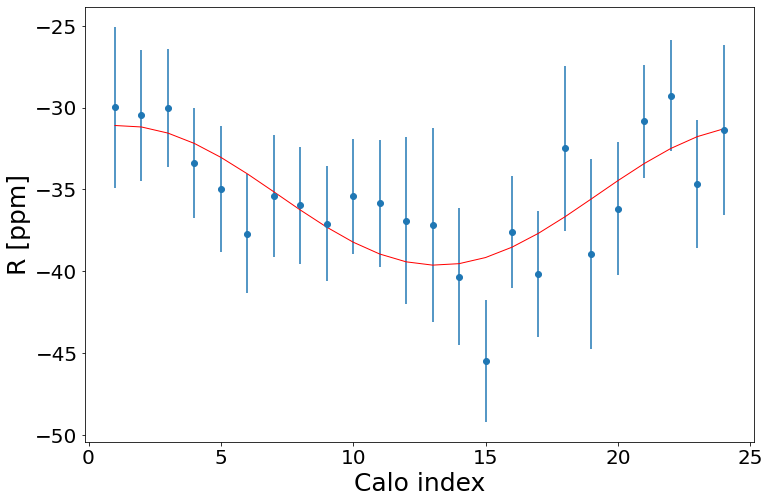

chi2/ndf= 9.921826239031281 /21
amplitude= 4.274184713632568  phase= 1.2583623354814124  offset= -35.35881910682877


In [28]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval3, p0=p_0, sigma=drval3)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval3, yerr=drval3, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval3)*(fit_Rwave(calonum, *rwave_p)-rval)/(drval3*drval3)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])


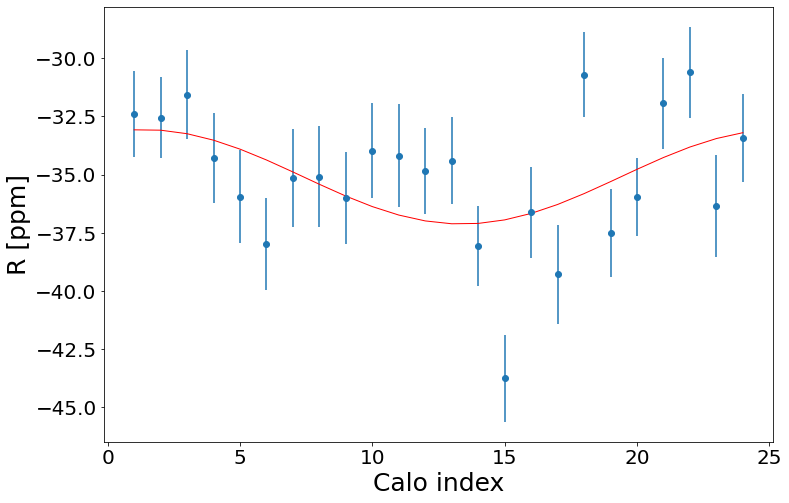

chi2/ndf= 42.76780880208127 /21
amplitude= 2.0287989004271374  phase= 1.2063859711759803  offset= -35.09153533219951


In [29]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval7, p0=p_0, sigma=drval7)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval7, yerr=drval7, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval7)*(fit_Rwave(calonum, *rwave_p)-rval7)/(drval7*drval7)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

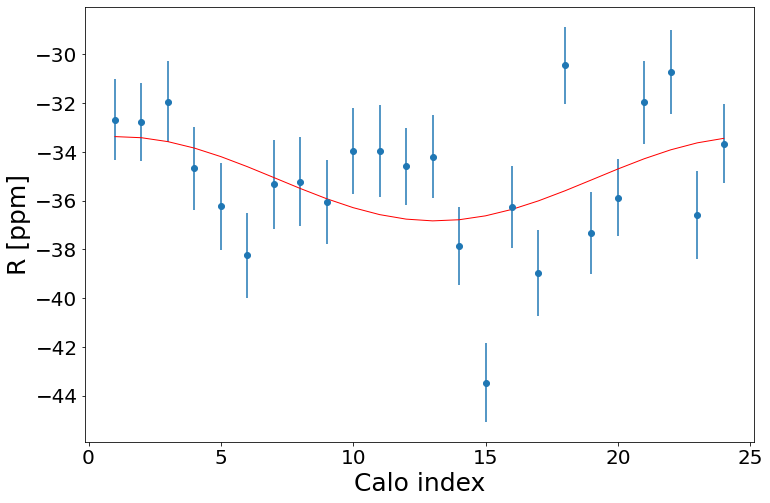

chi2/ndf= 57.07632370539654 /21
amplitude= 1.7300911728615567  phase= 1.280403405408836  offset= -35.1020705769702


In [30]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval11, p0=p_0, sigma=drval11)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval11, yerr=drval11, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval11)*(fit_Rwave(calonum, *rwave_p)-rval11)/(drval11*drval11)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

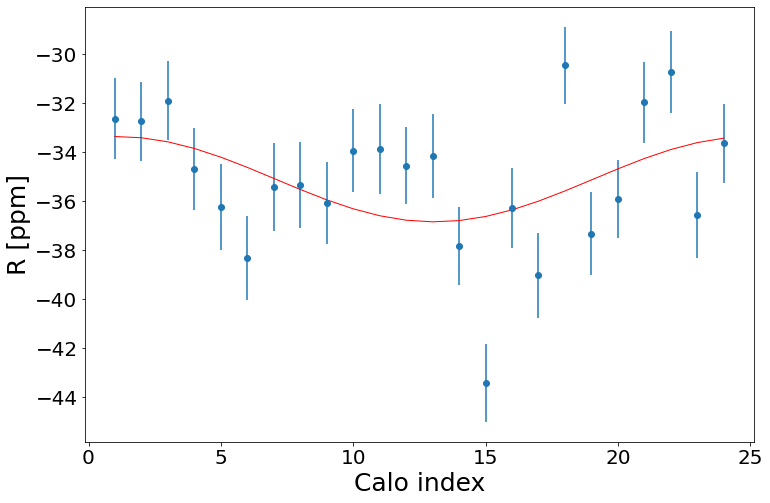

chi2/ndf= 59.215252141347065 /21
amplitude= 1.741507814619365  phase= 1.2910294561496427  offset= -35.11192884127771


In [31]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval15, p0=p_0, sigma=drval15)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval15, yerr=drval15, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval15)*(fit_Rwave(calonum, *rwave_p)-rval15)/(drval15*drval15)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

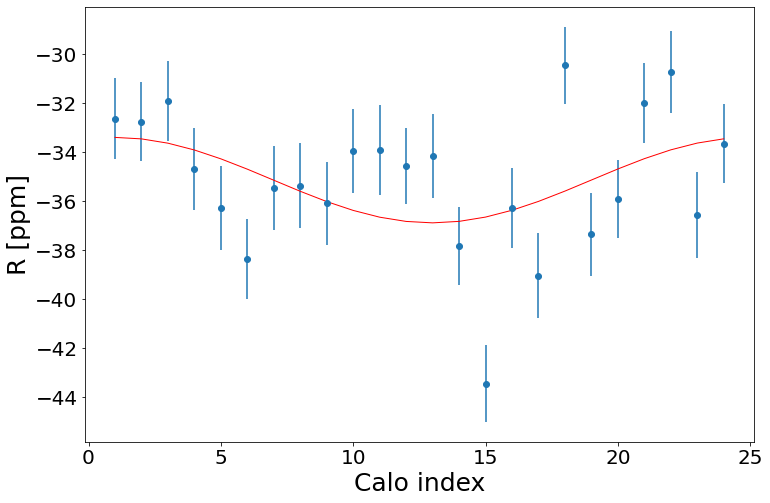

chi2/ndf= 60.513326499906434 /21
amplitude= 1.7423224804242659  phase= 1.3113953283907003  offset= -35.14148477014968


In [32]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval19, p0=p_0, sigma=drval19)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval19, yerr=drval19, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval19)*(fit_Rwave(calonum, *rwave_p)-rval19)/(drval19*drval19)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

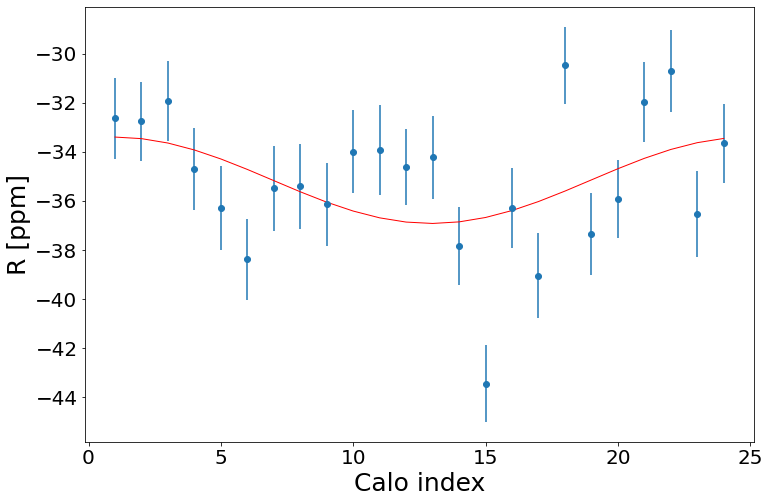

chi2/ndf= 60.79996012402529 /21
amplitude= 1.76140959461296  phase= 1.3173314207786186  offset= -35.16635439257465


In [33]:
p_0=[1.0,1.5,-35]

rwave_p, rwave_cov = opt.curve_fit(f=fit_Rwave, xdata=calonum, ydata=rval, p0=p_0, sigma=drval)

plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.plot(calonum, fit_Rwave(calonum, *rwave_p), linestyle='solid', linewidth=1, color='red')
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
chi2_1=np.empty(24)
chi2_1=(fit_Rwave(calonum, *rwave_p)-rval)*(fit_Rwave(calonum, *rwave_p)-rval)/(drval*drval)
print('chi2/ndf=',sum(chi2_1),'/21')
print('amplitude=',rwave_p[0],' phase=',rwave_p[1],' offset=',rwave_p[2])
#plt.savefig('run3btom_caloscan_Rfit_sine.jpg')

In [34]:
rval11

array([-32.67723633, -32.77257307, -31.9351849 , -34.67224965,
       -36.22571663, -38.24890734, -35.33446056, -35.22031446,
       -36.04694174, -33.96424206, -33.95799751, -34.58371882,
       -34.19269146, -37.85956583, -43.46515258, -36.2699002 ,
       -38.97958645, -30.44178415, -37.32610771, -35.87923994,
       -31.96224474, -30.71832235, -36.60782695, -33.66020686])

In [35]:
drval11

array([1.65884282, 1.61481161, 1.65575896, 1.69463168, 1.7821044 ,
       1.75584454, 1.82500161, 1.82240705, 1.73405846, 1.76155594,
       1.87445734, 1.57672546, 1.71626743, 1.59869335, 1.62222166,
       1.6821921 , 1.77525353, 1.58010448, 1.69361501, 1.5871747 ,
       1.6959845 , 1.73130304, 1.80386811, 1.62514195])

In [36]:
rval3

array([-29.9813081 , -30.47592068, -30.00271509, -33.37926163,
       -34.96300803, -37.71197522, -35.38955074, -35.972259  ,
       -37.08800018, -35.41527488, -35.84781224, -36.9026255 ,
       -37.16901694, -40.32338166, -45.4859897 , -37.60295947,
       -40.14700869, -32.48078895, -38.9389793 , -36.17404127,
       -30.83896701, -29.25589051, -34.65855679, -31.3800855 ])